In [2]:
import numpy as np

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
from NeuralNetNLayer import NeuralNet

**Load in and transform the dataset**

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
np.random.seed(1)

In [7]:
df = pd.read_csv('mnist/train.csv')

In [8]:
# Keep only the first two numbers (0 and 1) to convert this to binary classification
df_two = df[df['label'] <= 1]
df_two.label.value_counts()

1    4684
0    4132
Name: label, dtype: int64

In [9]:
# Check out the data - pixel values range from 0 to 255
df_two.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
256 * 3

768

In [11]:
# Split into X and y training and validation sets 
X_train, X_test, y_train, y_test = train_test_split(df_two.drop('label', axis=1), df_two['label'], train_size = 0.67)

In [12]:
# Standardize Before transposing (skelearn assumes obs x features format)
scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_s = scaler.transform(X_train)
# Transpose X and convert to an array
X_t = X_s.T
X_t.shape

(784, 5906)

In [13]:
# Transpose y and convert to an array
y_t = y_train.values.reshape(1, len(y_train))
y_t.shape

(1, 5906)

In [14]:
X_train.values.shape

(5906, 784)

TypeError: Invalid shape (784,) for image data

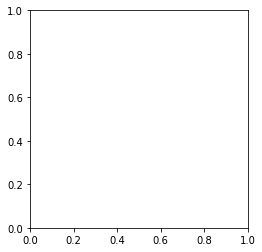

In [17]:
img = X_train.values[23, :]
plt.imshow(img, cmap='gray')

**Create and train the model**

In [59]:
from NeuralNetNLayer import NeuralNet

In [60]:
# Create and train the model with random initialization
clf = NeuralNet(X_t, y_t, [6, 3, 1], initialization = 'he', rseed=9)

In [61]:
# Train
clf.train(0.3, 500)

batch size:  5906
Iteration: 0 , Cost, Accuracy 0.6784773688887491 92.32983406705046
Iteration: 100 , Cost, Accuracy 0.0026876292734848524 99.96613613274636
Iteration: 200 , Cost, Accuracy 0.0009797340178566971 100.0
Iteration: 300 , Cost, Accuracy 0.0005832651822632082 100.0
Iteration: 400 , Cost, Accuracy 0.00040211886679553344 100.0


In [ ]:
Iteration: 0 , Cost, Accuracy 0.6931461445679936 56.010836437521164
Iteration: 100 , Cost, Accuracy 0.002636740896900212 99.91534033186589
Iteration: 200 , Cost, Accuracy 0.0009706861185968116 99.98306806637318
Iteration: 300 , Cost, Accuracy 0.0004884115268586416 100.0
Iteration: 400 , Cost, Accuracy 0.0002981384800126158 100.0
Iteration: 500 , Cost, Accuracy 0.00020494664657520731 100.0
Iteration: 600 , Cost, Accuracy 0.00015198378600915215 100.0
Iteration: 700 , Cost, Accuracy 0.00011869752860239252 100.0
Iteration: 800 , Cost, Accuracy 9.626666323453143e-05 100.0
Iteration: 900 , Cost, Accuracy 8.035432527794746e-05 100.0

In [45]:
# Create and train the model with he initialization and regularization
clf_reg = NeuralNet(X_t, y_t, [6, 4, 4, 1], initialization='he', rseed=9)


In [46]:
# Train with L2 regularization and he initialization (converges faster)
clf_reg.train(0.5, 500, lambd=0.5)

batch size:  5906
Iteration: 0 , Cost, Accuracy 0.6465630797760066 88.36776159837454
Iteration: 100 , Cost, Accuracy 0.024557324290791167 99.98306806637318
Iteration: 200 , Cost, Accuracy 0.012698991399595235 99.98306806637318
Iteration: 300 , Cost, Accuracy 0.008691416342701125 100.0
Iteration: 400 , Cost, Accuracy 0.006799830283246332 100.0


In [66]:
# Test training with minibatch as a comparison
clf_mb = NeuralNet(X_t, y_t, [6, 4, 4, 1], initialization='he', rseed=9)

In [67]:
# use minibatch training and momentum
clf_mb.train(0.5, 500, lambd = 0.2, batch_size=512, beta=0.9)

batch size:  512
Iteration: 0 , Cost, Accuracy 0.3198816422522636 99.33965458855401
Iteration: 100 , Cost, Accuracy 0.009752611206694536 100.0
Iteration: 200 , Cost, Accuracy 0.007120584060973405 100.0
Iteration: 300 , Cost, Accuracy 0.005670735212884082 100.0
Iteration: 400 , Cost, Accuracy 0.004813409847733941 100.0


In [ ]:
Iteration: 0 , Cost, Accuracy 0.7003623421666232 45.851676261429056
Iteration: 100 , Cost, Accuracy 0.0008563861218293847 99.98306806637318
Iteration: 200 , Cost, Accuracy 0.0003581953651630627 100.0
Iteration: 300 , Cost, Accuracy 0.00023849738139563234 100.0
Iteration: 400 , Cost, Accuracy 0.00020482161483901352 100.0
Iteration: 500 , Cost, Accuracy 0.00018803689291216962 100.0
Iteration: 600 , Cost, Accuracy 0.0001779576525541512 100.0
Iteration: 700 , Cost, Accuracy 0.0001712395789444225 100.0
Iteration: 800 , Cost, Accuracy 0.0001664257219015724 100.0
Iteration: 900 , Cost, Accuracy 0.00016281559811327605 100.0

**Test accuracy on the validation dataset**

In [23]:
# Standardize (using the original values) and transform
X_s = scaler.transform(X_test)
X_v = X_s.T
X_v.shape

(784, 2910)

In [24]:
y_v = y_test.values.reshape(1, len(y_test))
y_v.shape

(1, 2910)

In [50]:
clf.validation_accuracy(X_v=X_v, y_v=y_v)

70.51546391752578

In [48]:
# L2 regularization and he initialization gives similar validation accuracy in this case
clf_reg.validation_accuracy(X_v=X_v, y_v=y_v)

99.65635738831615

In [68]:
clf_mb.validation_accuracy(X_v=X_v, y_v=y_v)

99.93127147766323

In [ ]:
inline(inspect)

# Algorithm and Math Details

## Algorithm Steps

**Forward Propagation**

**Backpropagation**

First initalize the last layer using the derivative of the sigmoid (for 0/1 classification)

$dZ = A^{[L]} - y $

$dW = \frac{1}{m}*dZ • A^{[L-1]}$

$dB = \frac{1}{m}*\sum_{i} dZ $

Next calculate dA[L-1] to use in the next layer's dZ

$ dA^{[L-1]} = W.T•\frac{dJ}{dZ}  $

### Calculus Derivations

cost function, from:
$$J = -\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small  y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} \tag{1}$$

**Last Layer L**



$$\frac{dJ}{dW^{[L]}} =  \frac{dJ}{dA^{[L]}} \frac{dA^{[L]}}{dW^{[L]}} $$

$$ = \frac{dJ}{dA^{[L]}} \frac{dA^{[L]}}{dZ^{[L]}} \frac{dZ^{[L]}}{dW^{[L]}}$$

$$ \frac{dJ}{dA^{[L]}} = \frac{y}{A^{[L]}} - \frac{1-y}{1-A^{[L]}}$$

$$ A^{[L]} = \sigma(Z^{[L]})   $$  


$$ \frac{dA^{[L]}}{dZ^{[L]}} =  \sigma(Z^{[L]})(1-\sigma(Z^{[L]})) = A^{[L]}(1-A^{[L]}) $$

$$ \frac{dJ}{dZ^{[L]}} = {dZ^{[L]}} =  \frac{dJ}{dA^{[L]}} \frac{dA^{[L]}}{dZ^{[L]}} = \frac{A^{[L]}(1-A^{[L]})y}{A^{[L]}} - \frac{A^{[L]}(1-A^{[L]})(1-y)}{1-A^{[L]}}  $$

$$ = y - A^{[L]}y - A^{[L]} + A^{[L]}y
= y - A^{[L]} $$

$$ dZ^{[L]} = y - A^{[L]} $$

$$ Z^{[L]} = W^{[L]}.T•A^{[L-1]} + b^{[L]} $$

$$ \frac{dZ^{[L]}}{dW^{[L]}} = A^{[L-1]}$$

$$ dW^{[L]} = (y - A^{[L]})A^{[L-1]} $$

**Backpropagation Layers**

$$\frac{dJ}{dW^{[l]}} =  \frac{1}{m}\frac{dJ}{dA^{[l]}} \frac{dA^{[l]}}{dZ^{[l]}} \frac{dZ^{[l]}}{dW^{[l]}}$$ 

In the previous step, calculate the next layers dA using dZ from the previous layer

$$\frac{dJ}{dA^{[l]}} = \frac{dJ}{dZ^{[l+1]}}\frac{dZ^{[l+1]}}{dA^{[l]}} $$

A in terms of Al-1
$$ A^{[l+1]} = g(W^{[l+1]T}A^{[l]})  $$

Z_l is a function of A_l-1
$$ Z^{[l+1]} = W^{[l+1]T}A^{[l]} + b^{[l+1]} $$

$$ \frac{dZ^{[l+1]}}{dA^{[l]}} = W^{[l+1]T} $$

So the layer's calculations can easily give us dAl

$$\frac{dJ}{dA^{[l]}} = W^{[l+1]T} • \frac{dJ}{dZ^{[l+1]}} $$

Now use the dA_l-1 in the next layer (calclute the rest of the things)

$$ \frac{dA^{[l]}}{dZ^{[l]}} = g'(Z^{[l]})$$

$$ \frac{dZ^{[l]}}{dW^{[l]}} = W^{[l]} $$

so putting it all togther

$$\frac{dJ}{dW^{[l]}} =  \frac{1}{m}\frac{dJ}{dA^{[l]}} \frac{dA^{[l]}}{dZ^{[l]}} \frac{dZ^{[l]}}{dW^{[l]}} = \frac{1}{m}\frac{dJ}{dA^{[l]}} g'(Z^{[l]})  W^{[l]}
$$ 

Where dAl was calculated in the previous layer already

Save the dZ first part of this for use in the next layer:

$$ dZ^{[l]} = \frac{dJ}{dA^{[l]}} \frac{dA^{[l]}}{dZ^{[l]}} = 
\frac{dJ}{dA^{[l]}} g'(Z^{[l]}) $$

- Train on a single example (use L instead of J) is how the math works most easily
- Applying the gradient from each sample separately is stochastic gradient descent
- Applying all at once is regular gradient descent - extend by taking the average gradient (1/m)*grad
- Mini batch is somewhere in between

$$ \frac{dJ}{dA^{[L]}} = \frac{y}{\sigma(Z^{[L]})} - \frac{1-y}{1-\sigma(Z^{[L]})}$$

In [1]:
print i


SyntaxError: Missing parentheses in call to 'print'. Did you mean print(i)? (908402389.py, line 1)

In [2]:
i = 5
print(i)

5
